## Bigmart Sales Dataset - Python Mini Project

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [152]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

In [153]:
test  = pandas.read_csv('Test.csv')
test



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [154]:
train = pandas.read_csv('Train.csv')
train

#Item_Outlet_Sales is the target variable

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## 1) Problem Statement

To identify the sales of each product at a particular Bigmart store using 2013 sales data over 1559 products. 
Target variable = Item_Outlet_Sales

## 2) Hypothesis Generation

The variables of Item MRP and Outlet_Type may be some of the variables affecting sales of a product. 

## 3) Exploratory Data Analysis

Preprocessing for the train set: 

In [155]:
print(f"size of training set (row, col): {train.shape}\n\nsize of testing set (row, col): {test.shape}")

size of training set (row, col): (8523, 12)

size of testing set (row, col): (5681, 11)


In [156]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [157]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


As the testing and training datasets have different numbers of rows and columns, it is indicated that there are null values which make machine learning difficult. Hence all null values need to be removed. 

In [158]:
#missing values in decsending order
print("Train:\n")
print(train.isnull().sum().sort_values(ascending=False))
print("Test:\n")
print(test.isnull().sum().sort_values(ascending=False))

Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


The missing values of Item_Weight (numerical) and Outlet_Size (categorical) must be replaced. The categorical value must be replaced with the mode.

In [159]:
test.Outlet_Size.mode()

0    Medium
Name: Outlet_Size, dtype: object

In [160]:
train.Outlet_Size.mode()

0    Medium
Name: Outlet_Size, dtype: object

In [161]:
#train
train['Outlet_Size'] = train['Outlet_Size'].fillna(
train['Outlet_Size'].dropna().mode().values[0])

#test
test['Outlet_Size'] = test['Outlet_Size'].fillna(
test['Outlet_Size'].dropna().mode().values[0])



The numerical NaN values must be replaced with the mean of the dataset.

In [162]:
#train
train['Item_Weight'] = train['Item_Weight'].fillna(
train['Item_Weight'].dropna().mean())

#test
test['Item_Weight'] = test['Item_Weight'].fillna(
test['Item_Weight'].dropna().mean())



In [163]:
#describing cleaned data

test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [164]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [165]:
print("train:\n")
print(train.info())
print("\n\ntest:\n")
print(test.info())

train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


test:

<class 'pandas.core.fra

## 4) Univariate Analysis 

In [166]:
#Splitting df into numeric and categorical columns

#list of all the numeric columns
num = train.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = train.select_dtypes('object').columns.to_list()

#numeric df
trainnum =  train[num]
#categoric df
traincat = train[cat]

In [167]:
traincat.value_counts()

Item_Identifier  Item_Fat_Content  Item_Type              Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            LF                Soft Drinks            OUT035             Small        Tier 2                Supermarket Type1    1
FDV28            Regular           Frozen Foods           OUT010             Medium       Tier 3                Grocery Store        1
FDV32            Low Fat           Fruits and Vegetables  OUT035             Small        Tier 2                Supermarket Type1    1
                                                          OUT019             Small        Tier 1                Grocery Store        1
                                                          OUT018             Medium       Tier 3                Supermarket Type2    1
                                                                                                                                    ..
FDJ22            Low Fat           Snack Foods            OU

In [168]:
#train
train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#test
test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

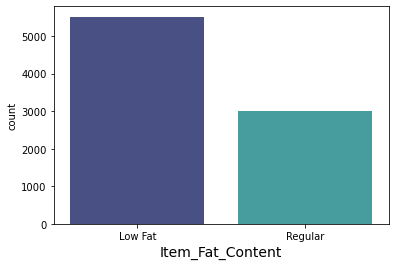

In [169]:
#Graphs for categprical data:

plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=train ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

Most items sold are low fat.

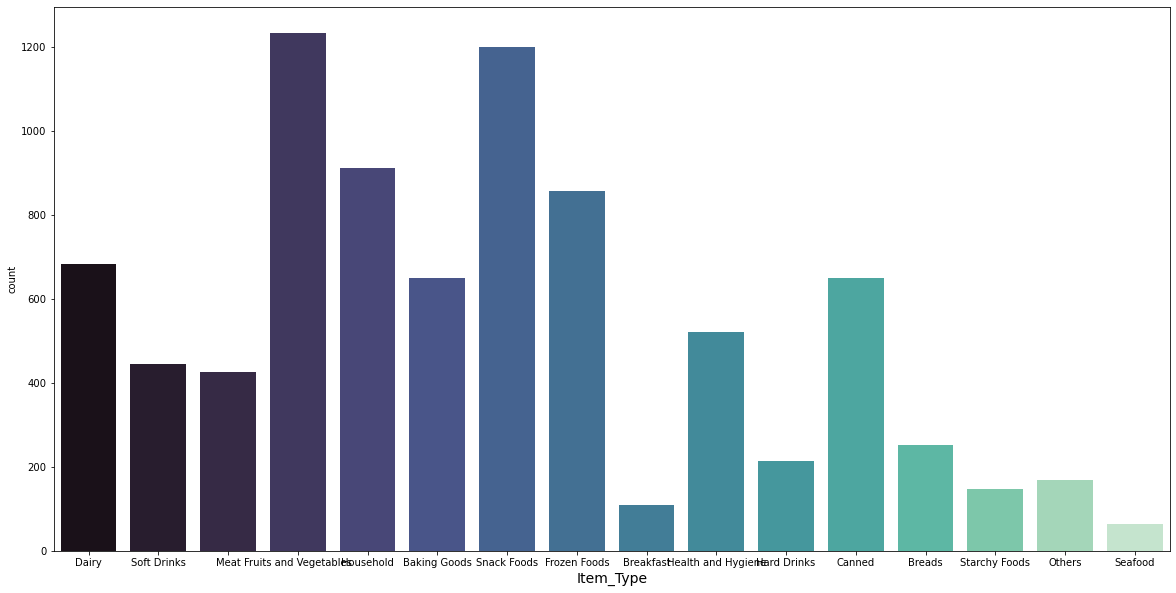

In [170]:
plt.figure(figsize=(20,10))
sns.countplot(x='Item_Type' , data=train ,palette='mako')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

Most frequently sold items are fruits and vegetables, followed by snack foods. 

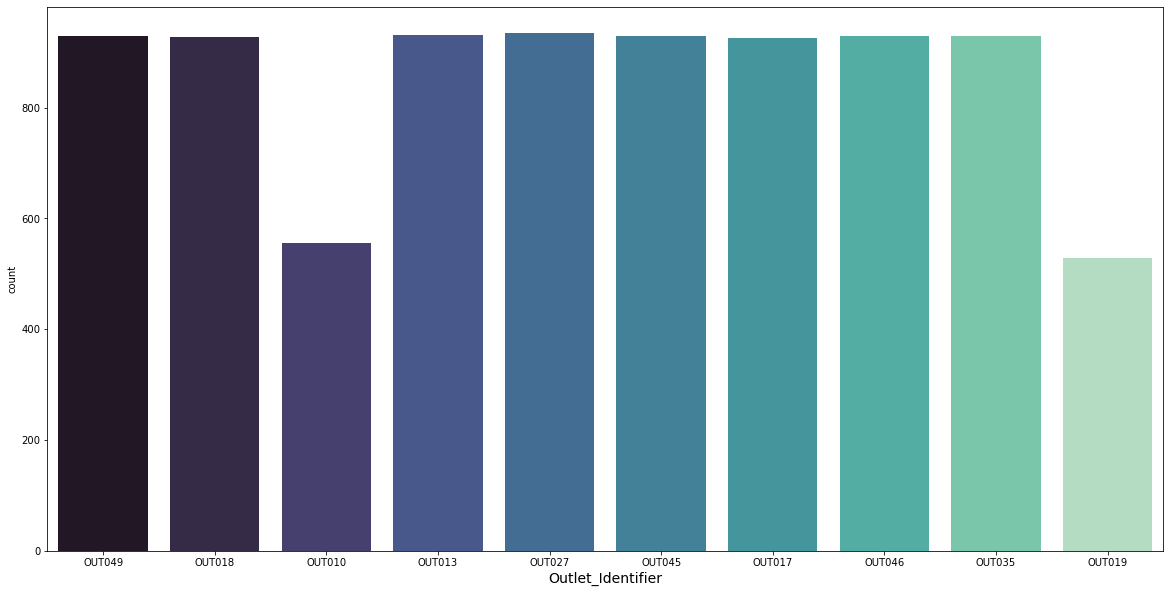

In [171]:
plt.figure(figsize=(20,10))
sns.countplot(x='Outlet_Identifier' , data=train ,palette='mako')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

All outlets have an equal distribution of product ecept OUT010 and OUT019.

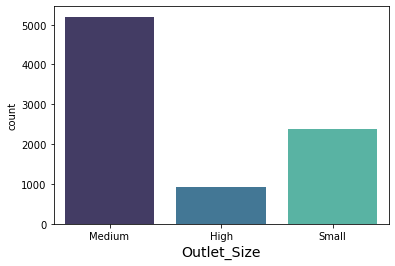

In [172]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outlet_Size' , data=train ,palette='mako')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

Medium sized outlets are most common. 

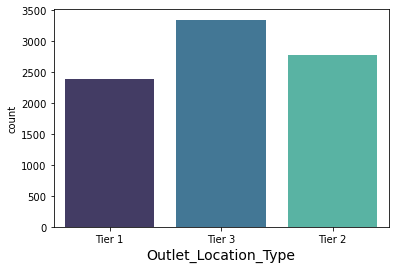

In [173]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outlet_Location_Type' , data=train ,palette='mako')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

Outlets located in Tier 3 are most common.

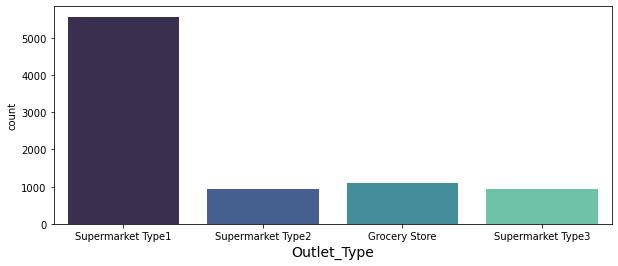

In [174]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=train ,palette='mako')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

Outlets of type Supermarket Type 1 are most common. 

/Users/trishapurnaiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


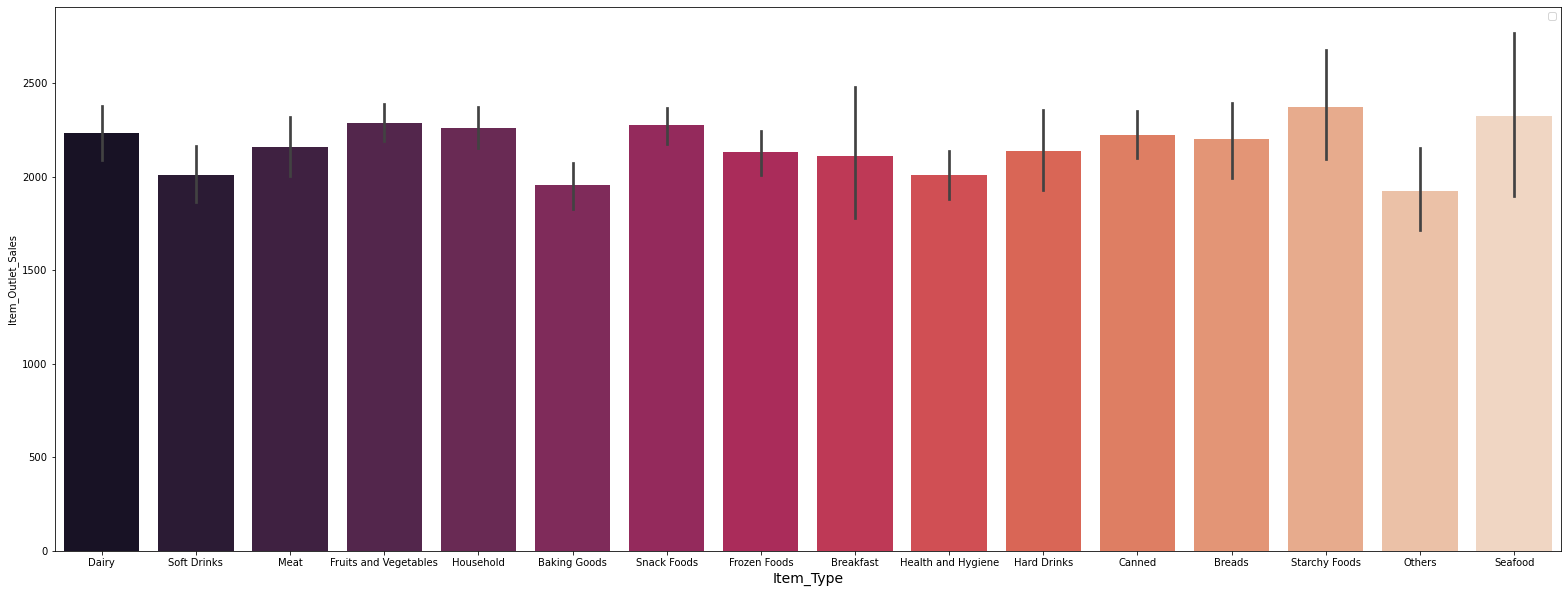

In [175]:
# Barplots of categorical data vs item sales:

plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=train ,palette='rocket')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

/Users/trishapurnaiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


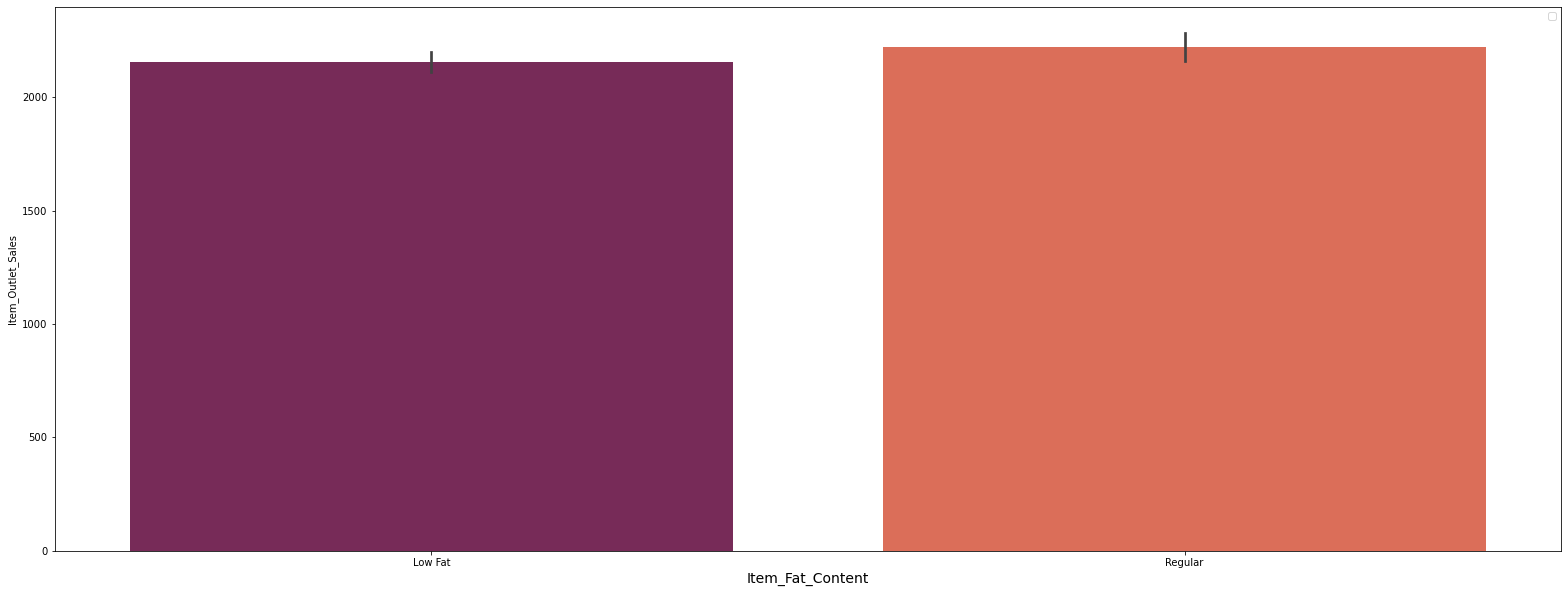

In [176]:
plt.figure(figsize=(27,10))
sns.barplot('Item_Fat_Content' ,'Item_Outlet_Sales', data=train ,palette='rocket')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.legend()
plt.show()

/Users/trishapurnaiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


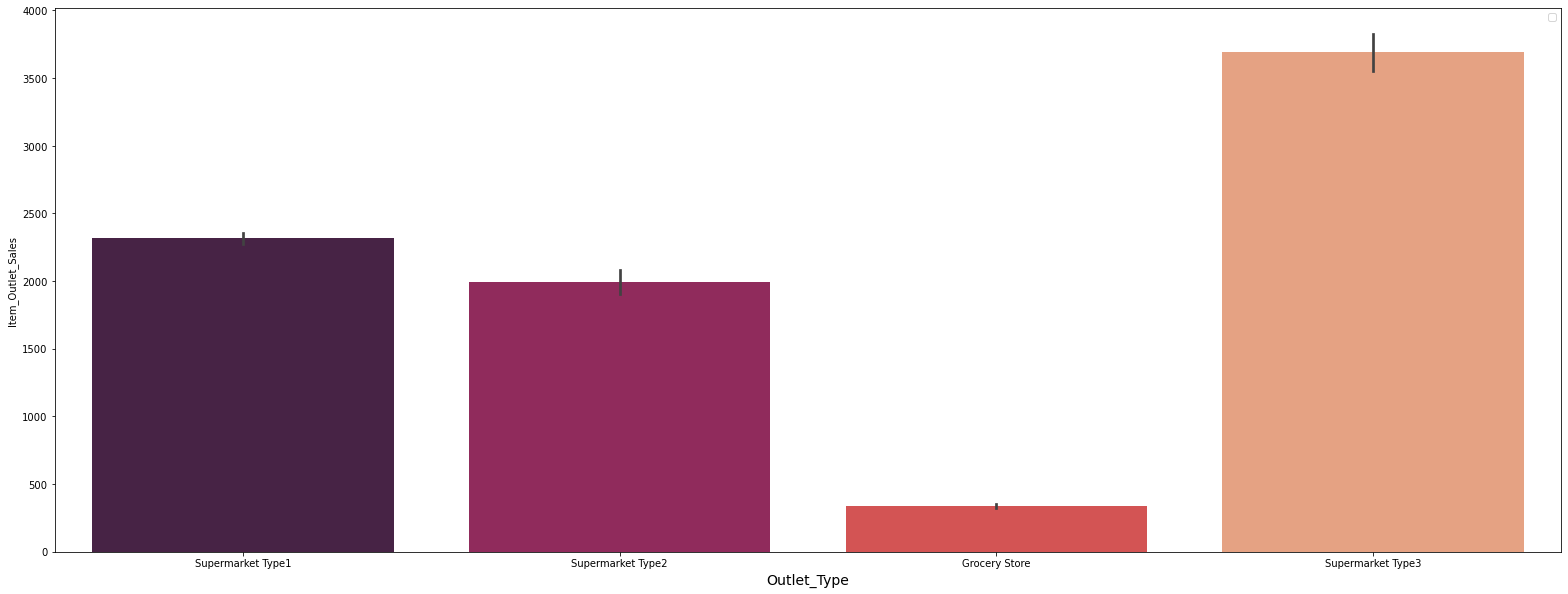

In [177]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=train ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

/Users/trishapurnaiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


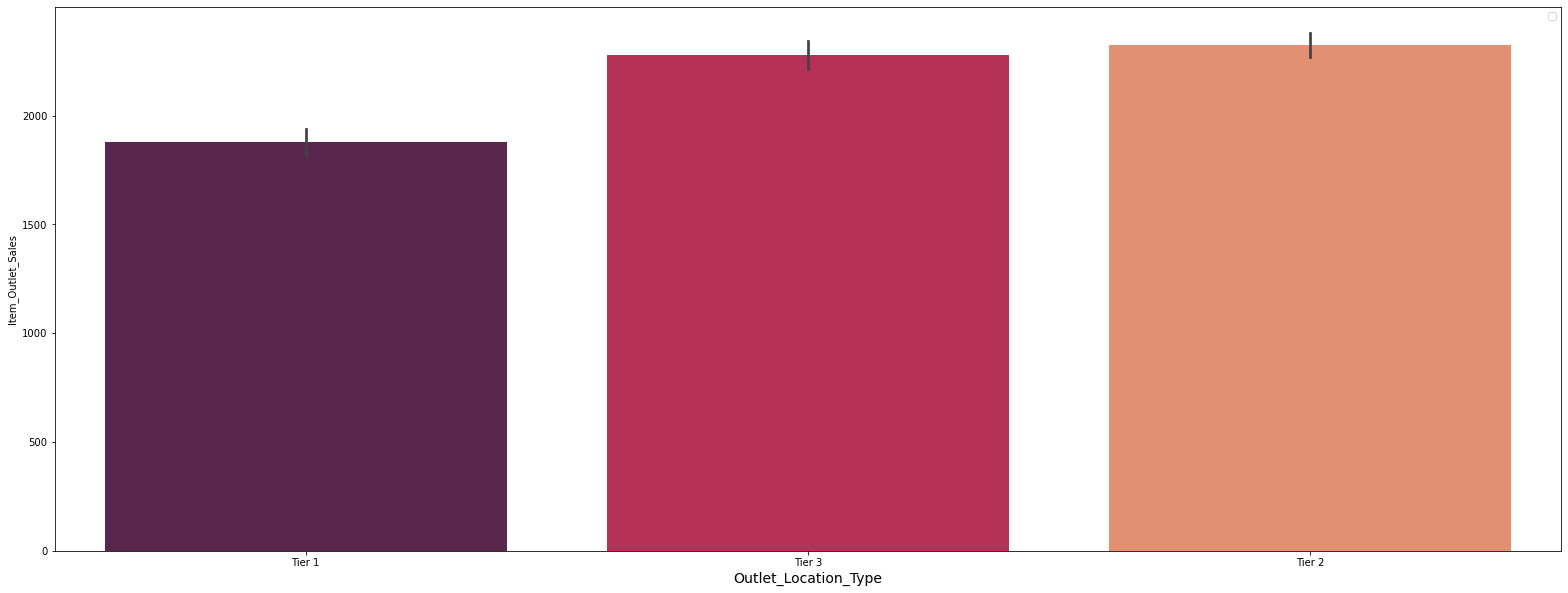

In [178]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=train ,palette='rocket')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()

/Users/trishapurnaiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


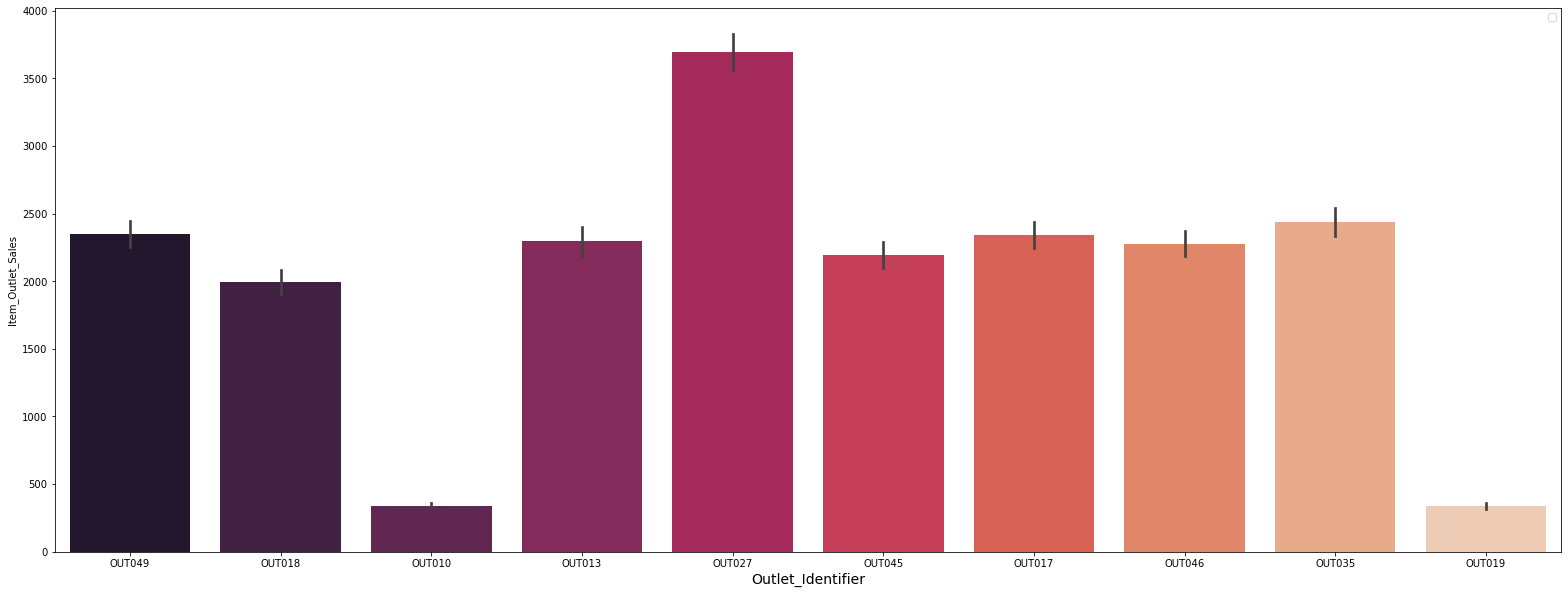

In [179]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=train ,palette='rocket')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

OUT027 has the highest item sales. Tier 2 and 3 outlets have similar item sales, as does Supermarket Type 3. The item type does not have a large impact on sales. 

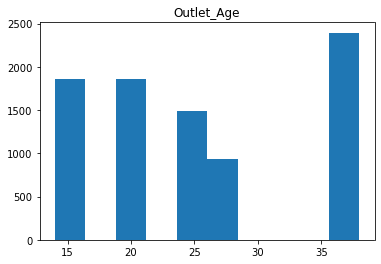

In [180]:
# numeric column analysis: 
train['Outlet_Age'], test['Outlet_Age']= train['Outlet_Establishment_Year'].apply(lambda year: 2023 - year), test['Outlet_Establishment_Year'].apply(lambda year: 2023 - year)

plt.hist(train['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

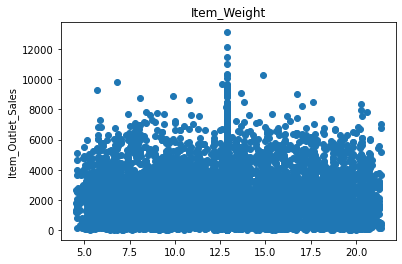

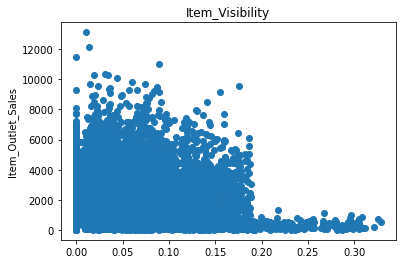

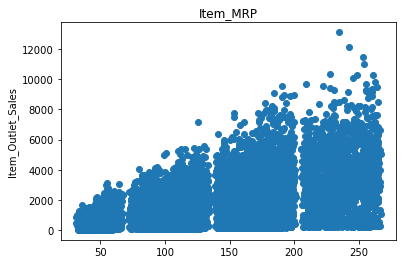

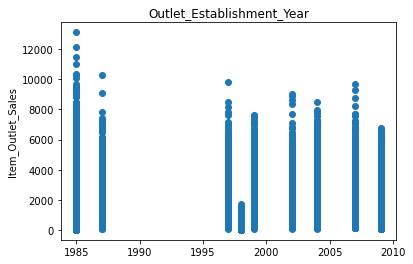

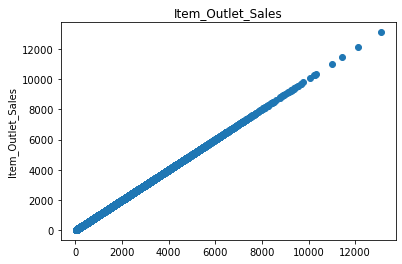

In [181]:
for numeric in trainnum:
    plt.scatter(trainnum[numeric], trainnum['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

There appears to be: 
- A positive correlation between Item_MRP and Item_Outlet_Sales
- A negative correlation between Item Visibility and Item_Outlet_Sales.

## 5) Multivariate Analysis

Correlation matrix of categorical variables and item price: 

<AxesSubplot:>

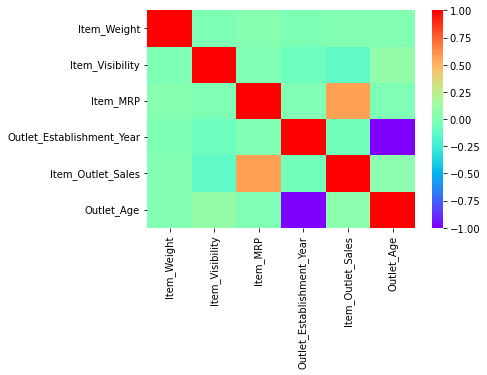

In [182]:
#plotting the correlation matrix
sns.heatmap(train.corr() ,cmap='rainbow')

Item_MRP has a high correlation with Item_Outlet_Sales. 

## 6) Machine Learning

In [183]:
#Removing irrelevant variables and label coding cat columns to numerical 


le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,24
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,14
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,24
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,25
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,36


In [184]:
test_oh = pandas.get_dummies(test, columns = ['Item_Type', 'Outlet_Type'])
print(test_oh)

     Item_Identifier  ...  Outlet_Type_Supermarket Type3
0              FDW58  ...                              0
1              FDW14  ...                              0
2              NCN55  ...                              0
3              FDQ58  ...                              0
4              FDY38  ...                              1
...              ...  ...                            ...
5676           FDB58  ...                              0
5677           FDD47  ...                              0
5678           NCO17  ...                              0
5679           FDJ26  ...                              0
5680           FDU37  ...                              0

[5681 rows x 30 columns]


In [185]:
train_oh = pandas.get_dummies(train, columns = ['Item_Type', 'Outlet_Type'])
print(train_oh)

     Item_Identifier  ...  Outlet_Type_Supermarket Type3
0              FDA15  ...                              0
1              DRC01  ...                              0
2              FDN15  ...                              0
3              FDX07  ...                              0
4              NCD19  ...                              0
...              ...  ...                            ...
8518           FDF22  ...                              0
8519           FDS36  ...                              0
8520           NCJ29  ...                              0
8521           FDN46  ...                              0
8522           DRG01  ...                              0

[8523 rows x 31 columns]


In [186]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
tr_oh = pandas.DataFrame(OH_encoder.fit_transform(train[cols])).astype('int64')
te_oh = pandas.DataFrame(OH_encoder.fit_transform(test[cols])).astype('int64')

# One-hot encoding removed index; put it back
tr_oh.index = train.index
te_oh.index = test.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired)
tr_fe = pandas.concat([train, tr_oh], axis=1)
te_fe = pandas.concat([test, te_oh], axis=1)

In [187]:
# Dropping irrelevant columns

tr_fe  = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [188]:
tr_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,0,0.016047,249.8092,1,0,3735.1380,24
1,5.92,1,0.019278,48.2692,1,2,443.4228,14
2,17.50,0,0.016760,141.6180,1,0,2097.2700,24
3,19.20,1,0.000000,182.0950,1,2,732.3800,25
4,8.93,0,0.000000,53.8614,0,2,994.7052,36


## 7) Regression

In [190]:
# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = train, formula = 'Item_Outlet_Sales ~ Item_Visibility + Item_MRP + Outlet_Size + Outlet_Location_Type + Outlet_Age')
                                                          
                                                        
# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     915.1
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:41:58   Log-Likelihood:                -73691.
No. Observations:                8523   AIC:                         1.474e+05
Df Residuals:                    8517   BIC:                         1.474e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -14.6992     86.744     -0.169      0.865    -184.739     155.340
Item_Visibility      -4217.5448    290.998    -14.493      0.000   -4787.972   -3647.118
Item_MRP                15.5605      0.239     64.972      0.000      15.091      16.030
Outlet_Size            -97.2568     32.093     -3.031      0.002    -160.166     -34.348
Outlet_Location_Type   126.4277     23.278      5.431      0.000      80.796     172.059
Outlet_Age              10.0982      1.825      5.534      0.000       6.521      13.675
==============================================================================
Omnibus:                      653.490   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1311.907
Skew:                           0.522   Prob(JB):                    1.33e-285
Kurtosis:                       4.614   Cond. No.                     3.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The slope coefficient of item visibility is -4217.54. The p-value  is 0.0, making it statistically significant. Hence, the lower the item visibility, the greater its sales.

- The slope coefficent of Item_MRP is 15.56. The p-value is 0.00, and this variable is statistically significant. For every Rs 15 increase in MRP, the customer is likely to buy one additional unit.

- The slope coefficient of outlet size and likelihood of purchase is -97.26. The p-value is 0.02, making this variable statistically significant. A customer is more likely to buy items from a small outlet than a big one. 

- The slope coefficient of outlet age and likelihood of purchase is 10.09. The p-value is 0.00, making this variable statistically significant. A customer is more likely to buy items from an older outlet than a newer one. 